# Predict Project Notebook: Movie Recommender System

© Explore Data Science Academy

---
### Honour Code

**Team_CB4**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Unsupervised Learning - Team Predict Overview

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

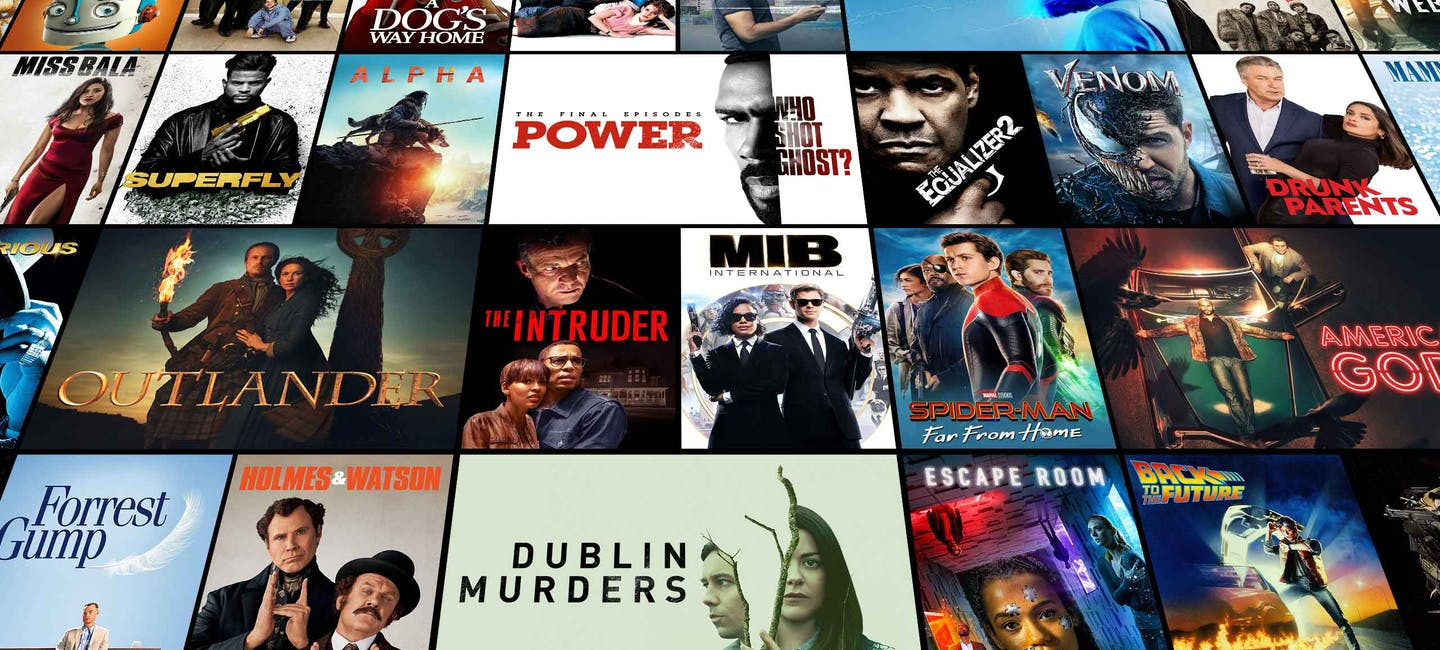

<a id="cont"></a>
_______________________________________________________________________________________________________________________________

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7.  Predicting on Unseen Data</a>

In [1]:
import numpy as np
import pandas as pd
import spacy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

import scipy as sp
from wordcloud import WordCloud, STOPWORDS
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import surprise
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
import time
from surprise import SVD
from surprise import accuracy
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse


import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.express as px
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
# NLTK - Natural Language Toolkit
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import re
import scipy as sp


# set plot style
sns.set()

from collections import Counter
# In anaconda prompt, type 'conda install -c conda-forge wordcloud=1.8.1'
from wordcloud import WordCloud
# In anaconda prompt, type 'conda install -c conda-forge spacy'
# followed by 'python -m spacy download en_core_web_sm'
# spaCy is a library for advanced natural language processing in Python
import spacy
nlp = spacy.load("en_core_web_sm")

import warnings
warnings.filterwarnings("ignore")

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [2]:
genome_scores = pd.read_csv('Data_folder/genome_scores.csv')
genome_tags = pd.read_csv('Data_folder/genome_tags.csv')
imdb_data_df = pd.read_csv('Data_folder/imdb_data.csv')
links_df = pd.read_csv('Data_folder/links.csv')
movies_df = pd.read_csv('Data_folder/movies.csv')
sample_submission = pd.read_csv('Data_folder/sample_submission.csv')
tags_df = pd.read_csv('Data_folder/tags.csv')
train_df = pd.read_csv('Data_folder/train.csv')
test_df = pd.read_csv('Data_folder/test.csv')

In [3]:
train_df.head()

userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

In [4]:
test_df.head()

userId  movieId
0       1     2011
1       1     4144
2       1     5767
3       1     6711
4       1     7318

In [5]:
tags_df.head()

userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

In [6]:
movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [7]:
links_df.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [8]:
imdb_data_df.head()

movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director  runtime       budget  \
0        John Lasseter     81.0  $30,000,000   
1   Jonathan Hensleigh    104.0  $65,000,000   
2  Mark Steven Johnson    101.0  $25,000,000   
3       Terry McMillan    124.0  $16,000,000   
4       Albert Hackett    106.0  $30,000,000   

                                       plot_keywords  
0                   toy|rivalry|cowboy|cgi animation  
1                   board game|adventurer|fight|game  
2                         boat|lake|neighbor|rivalry  
3  black american|husband wife relationship|betra...  
4                    fatherhood|doberman|dog|mansion

In [9]:
genome_tags.head()

tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

In [10]:
genome_scores.head()

movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375
2        1      3    0.06250
3        1      4    0.07575
4        1      5    0.14075

In [11]:
sample_submission.head()

Id  rating
0  1_2011     1.0
1  1_4144     1.0
2  1_5767     1.0
3  1_6711     1.0
4  1_7318     1.0

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

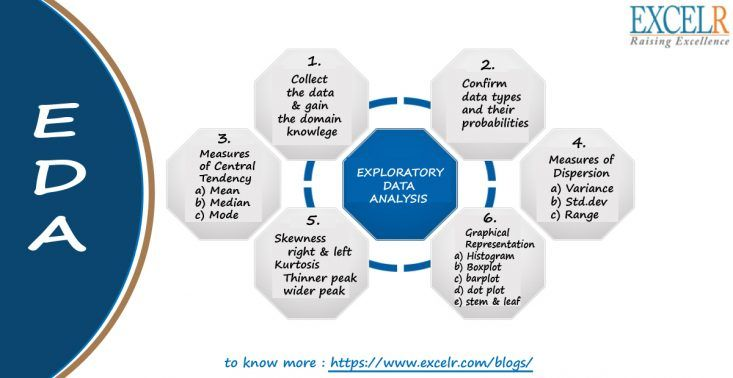

## Overview of train_df

In [12]:
train_df.head()

userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

In [13]:
train_df.shape

(10000038, 4)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [15]:
round(train_df.rating.describe(),0)

count    10000038.0
mean            4.0
std             1.0
min             0.0
25%             3.0
50%             4.0
75%             4.0
max             5.0
Name: rating, dtype: float64

### Let's find out the number of times a specific user has rated a movie and store these values in a dataframe

In [16]:
# Dataframe with rating count of each user
user_ratings_count = pd.DataFrame(train_df['userId'].value_counts()).reset_index()

user_ratings_count.rename(columns = {'index':'userId', 'userId':'count'},
                         inplace = True)

user_ratings_count.head()

userId  count
0   72315  12952
1   80974   3680
2  137293   3588
3   33844   3208
4   20055   3050

### Next, we'll group the users withing ranges according to the number of times they have rated

This way, we'll see whether a user regularly gives ratings, or does not give a lot of movie ratings.

This can also help us check for similarities between users and the rating they give, and also check how our ratings are distributed.

In [17]:
# Grouping users according to rating count

group_1 = user_ratings_count.loc[(user_ratings_count['count'] > 0) &
          (user_ratings_count['count'] < 50),
           'userId'].value_counts().sum()
group_2 = user_ratings_count.loc[(user_ratings_count['count'] >= 50) &
          (user_ratings_count['count']  < 500),
           'userId'].value_counts().sum()
group_3 = user_ratings_count.loc[(user_ratings_count['count'] >= 500) &
          (user_ratings_count['count'] < 1000),
           'userId'].value_counts().sum()
group_4 = user_ratings_count.loc[(user_ratings_count['count'] >= 1000) &
          (user_ratings_count['count'] < 1500),
           'userId'].value_counts().sum()
group_5 = user_ratings_count.loc[(user_ratings_count['count'] >= 1500),
           'userId'].value_counts().sum()

In [18]:
# Plot the gouped rating distribution

grouped_ratings = np.array([['group 1', group_1,'rating_count between 1 and 50'],
                        ['group 2', group_2,'rating_count between 50 and 500'],
                        ['group 3', group_3,'rating_count between 500 and 1000'],
                        ['group 4', group_4,'rating_count between 1000 and 1500'],
                        ['group 5', group_5,'rating_count greater than 1500']])

grouped_ratings_df = pd.DataFrame({'group': grouped_ratings[:, 0],
                                  'nr. of ratings': grouped_ratings[:, 1],
                                  'details': grouped_ratings[:, 2]})
# Bar Chart
fig = px.bar(grouped_ratings_df,
            x = grouped_ratings_df['group'],
            y = grouped_ratings_df['nr. of ratings'],
            color = grouped_ratings_df['group'],
            title = 'Grouped Rating Count')
fig.show()

In [19]:
grouped_ratings_df

group nr. of ratings                             details
0  group 1         110010       rating_count between 1 and 50
1  group 2          50973     rating_count between 50 and 500
2  group 3           1338   rating_count between 500 and 1000
3  group 4            159  rating_count between 1000 and 1500
4  group 5             61      rating_count greater than 1500

#### Observation:

### Distribution of Ratings

In [20]:
# Dataframe storing number of times a rating was assigned to a movie

ratings_count = pd.DataFrame(
                train_df['rating'].value_counts()).reset_index()

ratings_count.rename(
                    columns = {'index' :'rating', 'rating':'count'}, inplace = True)

ratings_count

rating    count
0     4.0  2652977
1     3.0  1959759
2     5.0  1445230
3     3.5  1270642
4     4.5   880516
5     2.0   656821
6     2.5   505578
7     1.0   311213
8     1.5   159731
9     0.5   157571

In [21]:
# Visualising the distribution of the ratings

fig = px.bar(ratings_count, x=ratings_count['rating'],
             y=ratings_count['count'],
             color=ratings_count['rating'],
             title='Distribustion by Rating')
fig.show()

#### Observation:

### Null Values

Missing values, mainly known as null values, occur due to multiple reasons including errors whilst collecting data. These values are either removed because they add no value to the output of the models or ignored depending on the amount of null values contained within a data frame; all data has to be valid and valued. Duplicates are also removed as they do not provide any new information. The reduced number of values also result in less model run time.

In [22]:
# Obtaining the total null values in each Data Frames columns
train_nulls = pd.DataFrame(train_df.isnull().sum())
test_nulls = pd.DataFrame(test_df.isnull().sum())
tags_nulls = pd.DataFrame(tags_df.isnull().sum())
movies_nulls = pd.DataFrame(movies_df.isnull().sum())
links_nulls = pd.DataFrame(links_df.isnull().sum())
imdb_nulls = pd.DataFrame(imdb_data_df.isnull().sum())
genomet_nulls = pd.DataFrame(genome_tags.isnull().sum())
genomes_nulls = pd.DataFrame(genome_scores.isnull().sum())


In [23]:
print(train_nulls)

           0
userId     0
movieId    0
rating     0
timestamp  0


In [24]:
print(test_nulls)

         0
userId   0
movieId  0


In [25]:
print(tags_nulls)

            0
userId      0
movieId     0
tag        16
timestamp   0


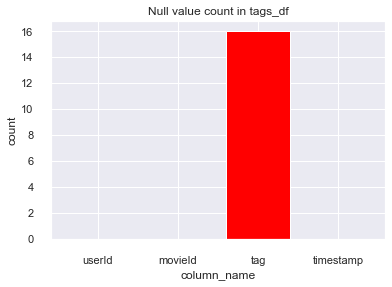

userId  movieId  tag   timestamp
860902  121710    33826  NaN  1221450908
976395  141727      123  NaN  1199450867
976396  141727      346  NaN  1199451946
976400  141727     1184  NaN  1199452261
976407  141727     1785  NaN  1199452006
976408  141727     2194  NaN  1199450677
976410  141727     2691  NaN  1199451002
976418  141727     4103  NaN  1199451920
976420  141727     4473  NaN  1199451040
976422  141727     4616  NaN  1199452441
976438  141727     7624  NaN  1199452266
976444  141727     8898  NaN  1199450757
976451  141727    32460  NaN  1199450901
976453  141727    33826  NaN  1199450703
976458  141727    36537  NaN  1199450736
976459  141727    55805  NaN  1199450941

In [26]:
plt.bar(tags_nulls.index,
        tags_nulls.values.reshape(len(tags_nulls), ),
        color= 'red')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in tags_df')
plt.show()
tags_df[tags_df.isnull().any(axis=1)]

In [27]:
print(movies_nulls)

         0
movieId  0
title    0
genres   0


In [28]:
print(links_nulls)

           0
movieId    0
imdbId     0
tmdbId   107


We can see that there are 107 null values in the links dataset. Let us visulaise this

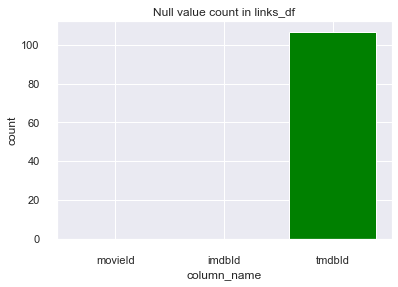

In [29]:
plt.bar(links_nulls.index,
        links_nulls.values.reshape(len(links_nulls), ),
        color='green')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in links_df')
plt.show()

In [30]:
print(imdb_nulls)

                   0
movieId            0
title_cast     10068
director        9874
runtime        12089
budget         19372
plot_keywords  11078


The imdb dataset has the most amount of null values in almost every column except for the movieId column. We'll also try to visualise this information

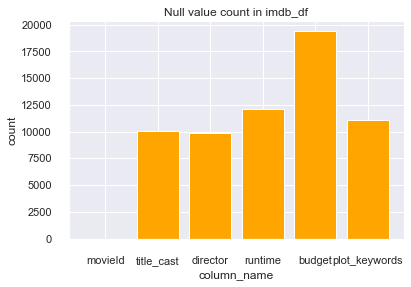

In [31]:
plt.bar(imdb_nulls.index,
        imdb_nulls.values.reshape(len(imdb_nulls), ),
        color='orange')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in imdb_df')
plt.show()

In [32]:
print(genomet_nulls)

       0
tagId  0
tag    0


In [33]:
print(genomes_nulls)

           0
movieId    0
tagId      0
relevance  0


Based on the above infomation, majority of our data frames had no null values present. Removing the null values could give more refined data depending on the amount of null values present. The imdb_df had a large amount of null values and dropping these rows would resulted in a smaller dataset, which is not desirable because we would lose a large chunk of our data.

### Checking for commonality between dataframes

Next, we'll look at how our dataframes relate and whether there is any correlation between our variables. This will help us to link our dataframes and make more meaningfull observations.

#### Train and Tags


In [34]:
# Correlation between the train_df and tags_df
train_tags_corr = pd.concat([train_df, tags_df], axis=1).corr()
train_tags_corr.head()

userId   movieId    rating  timestamp    userId   movieId  \
userId     1.000000 -0.004270  0.002202  -0.001347  0.000358  0.001594   
movieId   -0.004270  1.000000 -0.008940   0.520786 -0.000767  0.000471   
rating     0.002202 -0.008940  1.000000   0.010301 -0.000945 -0.000976   
timestamp -0.001347  0.520786  0.010301   1.000000 -0.000822 -0.000272   
userId     0.000358 -0.000767 -0.000945  -0.000822  1.000000 -0.101326   

           timestamp  
userId      0.000976  
movieId    -0.000131  
rating     -0.002160  
timestamp   0.000737  
userId     -0.197582

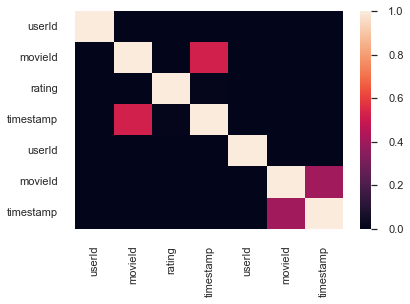

In [35]:
ax = sns.heatmap(train_tags_corr, vmin=0, vmax=1)

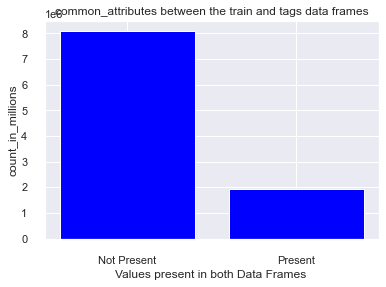

In [36]:
# Finding values in the userID columns of the tags and train data frame.
common_at2 = pd.DataFrame(train_df['userId'].isin(tags_df['userId']).
                          value_counts())
plt.bar(['Not Present', 'Present'],
        common_at2.values.reshape(len(common_at2), ),
        color='blue')
plt.xlabel('Values present in both Data Frames ')
plt.ylabel('count_in_millions')
plt.title('common_attributes between the train and tags data frames')
plt.show()




#### Train and Movies

In [37]:
# Correlation between the train_df and movies_df
train_movies_corr = pd.concat([train_df, tags_df], axis=1).corr()
train_movies_corr.head()

userId   movieId    rating  timestamp    userId   movieId  \
userId     1.000000 -0.004270  0.002202  -0.001347  0.000358  0.001594   
movieId   -0.004270  1.000000 -0.008940   0.520786 -0.000767  0.000471   
rating     0.002202 -0.008940  1.000000   0.010301 -0.000945 -0.000976   
timestamp -0.001347  0.520786  0.010301   1.000000 -0.000822 -0.000272   
userId     0.000358 -0.000767 -0.000945  -0.000822  1.000000 -0.101326   

           timestamp  
userId      0.000976  
movieId    -0.000131  
rating     -0.002160  
timestamp   0.000737  
userId     -0.197582

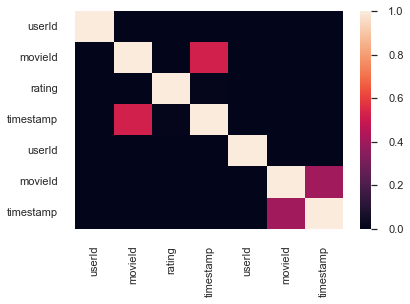

In [38]:
ax = sns.heatmap(train_movies_corr, vmin=0, vmax=1)

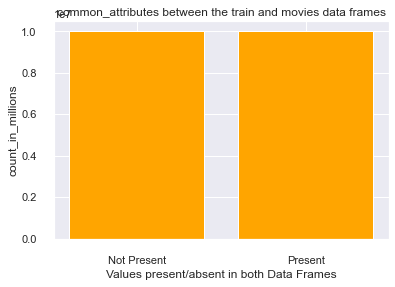

In [39]:
# Finding values in the movieId columns of the train and movies data frame.
common_at = pd.DataFrame(train_df['movieId'].isin(movies_df['movieId']).
                         value_counts())
plt.bar(['Not Present', 'Present'],
        common_at.values.reshape(len(common_at), ),
        color='orange')
plt.xlabel('Values present/absent in both Data Frames')
plt.ylabel('count_in_millions')
plt.title('common_attributes between the train and movies data frames')
plt.show()


#### Train and Links

In [40]:
# Correlation between the train_df and links_df
train_imdb_corr = pd.concat([train_df, imdb_data_df], axis=1).corr()
train_imdb_corr.head()

userId   movieId    rating  timestamp   movieId   runtime
userId     1.000000 -0.004270  0.002202  -0.001347  0.000983  0.012350
movieId   -0.004270  1.000000 -0.008940   0.520786  0.005087  0.000083
rating     0.002202 -0.008940  1.000000   0.010301  0.013872 -0.013571
timestamp -0.001347  0.520786  0.010301   1.000000  0.000951  0.010821
movieId    0.000983  0.005087  0.013872   0.000951  1.000000 -0.132730

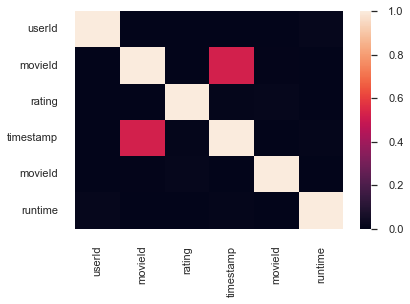

In [41]:
ax = sns.heatmap(train_imdb_corr, vmin=0, vmax=1)

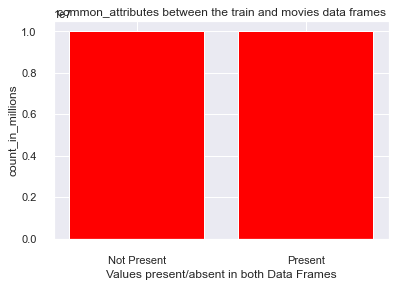

In [42]:
# Finding values in the movieId columns of the train and movies data frame.
common_at = pd.DataFrame(train_df['movieId'].isin(movies_df['movieId']).
                         value_counts())
plt.bar(['Not Present', 'Present'],
        common_at.values.reshape(len(common_at), ),
        color='red')
plt.xlabel('Values present/absent in both Data Frames')
plt.ylabel('count_in_millions')
plt.title('common_attributes between the train and movies data frames')
plt.show()

Observation:

We have attempted to find links between different dataframes and feautures. 

Although the train and tags dataframes have similar userIds, most of the users are new and not present in both sets of data

The train and links dataframes do have similar movieIds, but have no other common attributes

The dataframes that have the most common links are the train,imdb and movies dataframes. Linking these dataframes would help to extend our understanding of the ratings based on movie genres, directors, movie budgets and their titles.

In [43]:
# Merging the train and movies dataframes

movie_data = pd.merge(train_df, movies_df, on='movieId')
movie_data.head()

userId  movieId  rating   timestamp             title  \
0    5163    57669     4.0  1518349992  In Bruges (2008)   
1   87388    57669     3.5  1237455297  In Bruges (2008)   
2  137050    57669     4.0  1425631854  In Bruges (2008)   
3  120490    57669     4.5  1408228517  In Bruges (2008)   
4   50616    57669     4.5  1446941640  In Bruges (2008)   

                        genres  
0  Comedy|Crime|Drama|Thriller  
1  Comedy|Crime|Drama|Thriller  
2  Comedy|Crime|Drama|Thriller  
3  Comedy|Crime|Drama|Thriller  
4  Comedy|Crime|Drama|Thriller

In [44]:
# Merging the train and movies dataframes with imdb_data_df

movie_data = pd.merge(movie_data, imdb_data_df, on='movieId')
movie_data.head()

userId  movieId  rating   timestamp             title  \
0    5163    57669     4.0  1518349992  In Bruges (2008)   
1   87388    57669     3.5  1237455297  In Bruges (2008)   
2  137050    57669     4.0  1425631854  In Bruges (2008)   
3  120490    57669     4.5  1408228517  In Bruges (2008)   
4   50616    57669     4.5  1446941640  In Bruges (2008)   

                        genres  \
0  Comedy|Crime|Drama|Thriller   
1  Comedy|Crime|Drama|Thriller   
2  Comedy|Crime|Drama|Thriller   
3  Comedy|Crime|Drama|Thriller   
4  Comedy|Crime|Drama|Thriller   

                                          title_cast         director  \
0  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
1  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
2  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
3  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
4  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   

   runtime       budget              plot_keywords  
0    107.0  $15,000,000  dwarf|bruges|irish|hitman  
1    107.0  $15,000,000  dwarf|bruges|irish|hitman  
2    107.0  $15,000,000  dwarf|bruges|irish|hitman  
3    107.0  $15,000,000  dwarf|bruges|irish|hitman  
4    107.0  $15,000,000  dwarf|bruges|irish|hitman

In [45]:
# Lets find the average rating per title

movie_data.groupby('title')['rating'].mean().head()

title
"Great Performances" Cats (1998)    2.753731
$ (Dollars) (1971)                  2.875000
$5 a Day (2008)                     3.125000
$9.99 (2008)                        3.222222
$ellebrity (Sellebrity) (2012)      2.250000
Name: rating, dtype: float64

In [46]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Wrestling for Jesus: The Tale of T-Money (2011)    5.0
The... Beautiful Country (1977)                    5.0
Only Daughter (2013)                               5.0
Vasermil (2007)                                    5.0
Day the Universe Changed, The (1985)               5.0
Name: rating, dtype: float64

In [47]:
# Lets also find the average number of times a movie has been rated.
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Shawshank Redemption, The (1994)    32831
Forrest Gump (1994)                 32383
Pulp Fiction (1994)                 31697
Silence of the Lambs, The (1991)    29444
Matrix, The (1999)                  29014
Name: rating, dtype: int64

In [48]:
average_rates = pd.DataFrame(movie_data.groupby('movieId')['rating'].
                                  mean())
average_rates['rating_count'] = pd.DataFrame(movie_data.
                                                   groupby('movieId')
                                                   ['rating'].count())
average_rates.head()


rating  rating_count
movieId                        
1        3.889971         23062
2        3.263414          9654
3        3.132325          4727
4        2.878099           968
5        3.059165          4648

<Figure size 576x432 with 0 Axes>

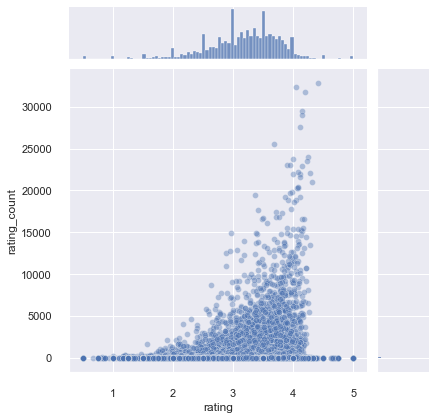

In [49]:
plt.figure(figsize=(8, 6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_count',
              data= average_rates,
              alpha=0.4)
plt.show()

Observations:
These averages could be misleading seeing that users could have rated a movie only once and this could possibly increase the average rating for that specific movie. This shows some inconsistency in our dataset, which could lead to a biased model when making rating predictions.

### Word Frequency

We'll be using word clouds to see the most frequent words in our datasets. This will definitely help to see significant textual data points.

A word cloud is a visual representation of words. They are used to highlight popular words and phrases based on their frequency and relevance. They provide us with quick and simple visual insights that can lead to more in-depth analyses.

The size of each word indicates it's frequency or importance.

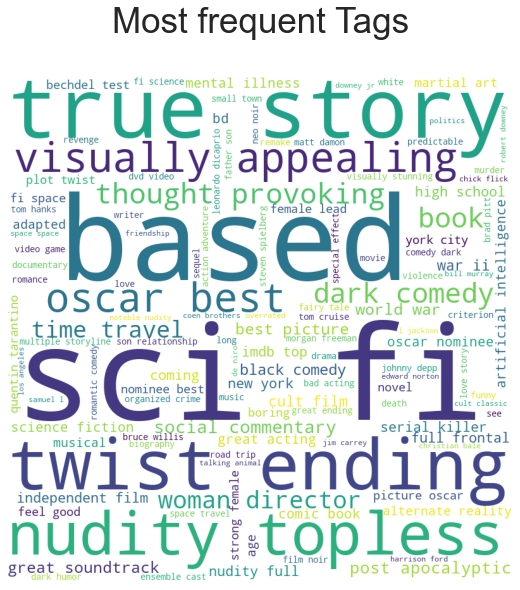

In [50]:
# Most frequent Tags

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in tags_df['tag']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Most frequent Tags\n', fontsize = 35)
plt.tight_layout(pad=0)

plt.show()

In [51]:
value_count = pd.DataFrame(tags_df['tag'].
                           value_counts()).reset_index()
value_count.rename(columns = {'index': 'tag', 'tag': 'count'},
                   inplace = True)

value_count.head()

tag  count
0       sci-fi   8330
1  atmospheric   6516
2       action   5907
3       comedy   5702
4      surreal   5326

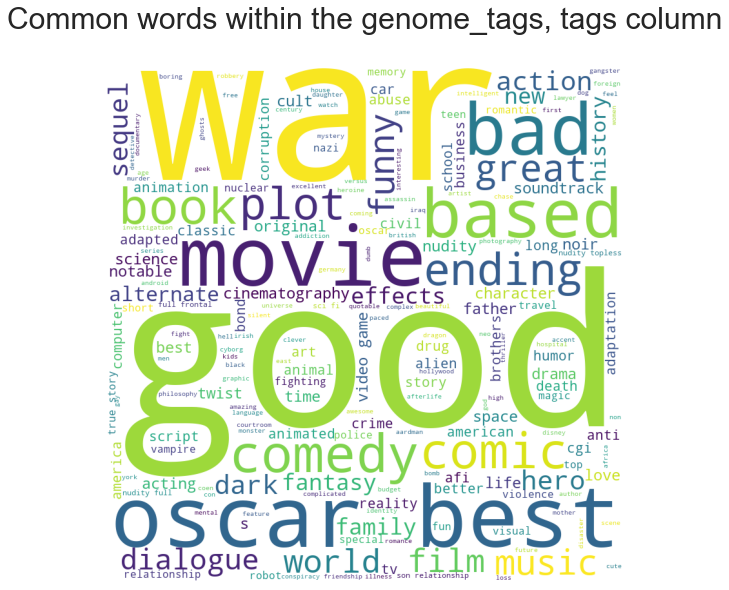

In [57]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in genome_tags['tag']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Common words within the genome_tags, tags column\n', fontsize = 30)
plt.tight_layout(pad=0)

plt.show()

#### Movie Genres

We'll explore and take a look at the movie genres

In [60]:
genres_df = pd.DataFrame(movies_df['genres'].
                      str.split("|").
                      tolist(),
                      index=movies_df['movieId']).stack()
genres_df = genres_df.reset_index([0, 'movieId'])
genres_df.columns = ['movieId', 'Genre']

genres_df.head()

movieId      Genre
0        1  Adventure
1        1  Animation
2        1   Children
3        1     Comedy
4        1    Fantasy

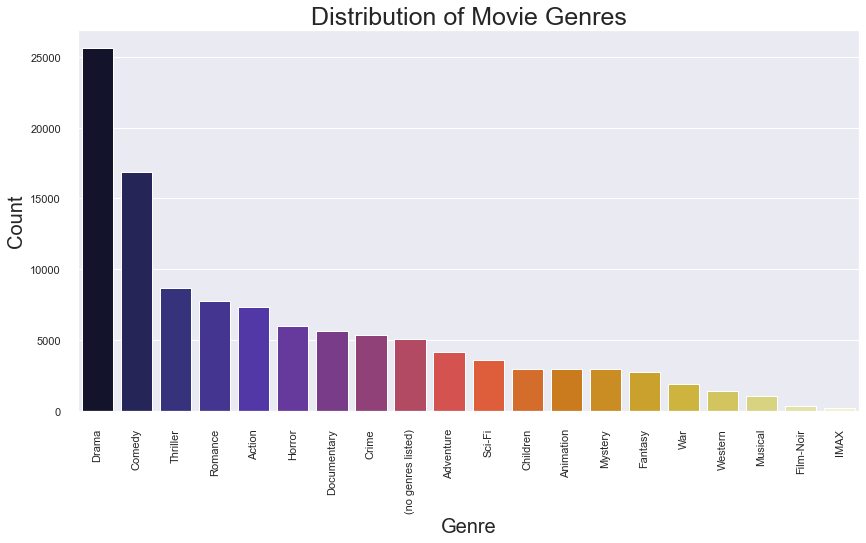

In [61]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='Genre',
              data=genres_df,
              palette='CMRmap',
              order=genres_df['Genre'].
              value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

Observation:

#### Movie Budgets

Next we'll explore and take a look at the movie budgets

In [68]:
movie_data

userId  movieId  rating   timestamp  \
0          5163    57669     4.0  1518349992   
1         87388    57669     3.5  1237455297   
2        137050    57669     4.0  1425631854   
3        120490    57669     4.5  1408228517   
4         50616    57669     4.5  1446941640   
...         ...      ...     ...         ...   
9633026  129077    66579     3.0  1446895942   
9633027   78784    96316     3.5  1345995049   
9633028   80974    82732     3.0  1293164312   
9633029   84146   107912     3.0  1389449965   
9633030   72315    97148     3.0  1567584197   

                                           title                       genres  \
0                               In Bruges (2008)  Comedy|Crime|Drama|Thriller   
1                               In Bruges (2008)  Comedy|Crime|Drama|Thriller   
2                               In Bruges (2008)  Comedy|Crime|Drama|Thriller   
3                               In Bruges (2008)  Comedy|Crime|Drama|Thriller   
4                               In Bruges (2008)  Comedy|Crime|Drama|Thriller   
...                                          ...                          ...   
9633026                         Lost, The (2009)                     Thriller   
9633027                            Aliisa (1970)                        Drama   
9633028             New York Confidential (1955)        Crime|Drama|Film-Noir   
9633029                       Fallen, The (2004)             Action|Drama|War   
9633030  Elia Kazan: A Director's Journey (1995)                  Documentary   

                                                title_cast          director  \
0        Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...   Martin McDonagh   
1        Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...   Martin McDonagh   
2        Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...   Martin McDonagh   
3        Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...   Martin McDonagh   
4        Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...   Martin McDonagh   
...                                                    ...               ...   
9633026  Armand Assante|Dina Meyer|Lacey Chabert|Sergi ...       Dan Dworkin   
9633027  Siiri Angerkoski|Selma Miettinen|Varma Lahtine...   Aulikki Oksanen   
9633028                                                NaN               NaN   
9633029  Christopher R Swanson|Daniel Asher|Brian Banca...          Nick Day   
9633030                             Elia Kazan|Eli Wallach  Richard Schickel   

         runtime       budget                                  plot_keywords  
0          107.0  $15,000,000                      dwarf|bruges|irish|hitman  
1          107.0  $15,000,000                      dwarf|bruges|irish|hitman  
2          107.0  $15,000,000                      dwarf|bruges|irish|hitman  
3          107.0  $15,000,000                      dwarf|bruges|irish|hitman  
4          107.0  $15,000,000                      dwarf|bruges|irish|hitman  
...          ...          ...                                            ...  
9633026     95.0          NaN                                            NaN  
9633027      NaN          NaN  janitor|income|housing problem|social problem  
9633028      NaN          NaN                                            NaN  
9633029    112.0     $600,000                 soldier|italy|partisan|fascist  
9633030     75.0          NaN         genius|artist|greek american|direction  

[9633031 rows x 11 columns]

In [69]:
movie_data.isnull().sum()

userId                 0
movieId                0
rating                 0
timestamp              0
title                  0
genres                 0
title_cast       2604407
director         2602688
runtime          2653058
budget           3152276
plot_keywords    2610043
dtype: int64

The budget feature currently has 3152276 null values

We can try to replace these null values with an average across all budgets, but this would not be ideal since the movies were released years apart

In [71]:
movie_data['budget'] = movie_data['budget'].str.replace('[\,]', '', regex=True)

In [72]:
def clean_txt(text):
    text = re.sub(r'[0-9]+', "", str(text))
    return text

movie_data['currency'] = movie_data['budget'].apply(clean_txt)
movie_data.head()


userId  movieId  rating   timestamp             title  \
0    5163    57669     4.0  1518349992  In Bruges (2008)   
1   87388    57669     3.5  1237455297  In Bruges (2008)   
2  137050    57669     4.0  1425631854  In Bruges (2008)   
3  120490    57669     4.5  1408228517  In Bruges (2008)   
4   50616    57669     4.5  1446941640  In Bruges (2008)   

                        genres  \
0  Comedy|Crime|Drama|Thriller   
1  Comedy|Crime|Drama|Thriller   
2  Comedy|Crime|Drama|Thriller   
3  Comedy|Crime|Drama|Thriller   
4  Comedy|Crime|Drama|Thriller   

                                          title_cast         director  \
0  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
1  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
2  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
3  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
4  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   

   runtime     budget              plot_keywords currency  
0    107.0  $15000000  dwarf|bruges|irish|hitman        $  
1    107.0  $15000000  dwarf|bruges|irish|hitman        $  
2    107.0  $15000000  dwarf|bruges|irish|hitman        $  
3    107.0  $15000000  dwarf|bruges|irish|hitman        $  
4    107.0  $15000000  dwarf|bruges|irish|hitman        $

In [73]:
currencies_df = pd.DataFrame(movie_data['currency'].
                                   value_counts()).reset_index()
currencies_df.rename(columns={'index': 'currency', 'currency': 'count'},
                           inplace=True)
currencies_df.head()

currency    count
0        $  6298629
1      nan  3152276
2      GBP    66891
3      EUR    38374
4      FRF    24605

In [75]:
fig = px.bar(currencies_df, x=currencies_df['currency'],
             y=currencies_df['count'],
             color=currencies_df['currency'],
             title='Currency Type Distribution')
fig.show()

In [76]:
currencies = list(currencies_df['currency'])
# Number of currencies
len(set(currencies))-1

49

Observations:

We can see that we have a total of 49 currencies in our dataset.

The most common currency is the US Dollar, which could mean most of the movies were produced in the United States.

We can also see that more than 50% of our data in the budget column are null values.